<a href="https://colab.research.google.com/github/yuwang1028/694_Team15_DBMS_2024/blob/main/hate_speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Data Process
we split the raw dataset into training, development and test sets.

In [ ]:
!pip install transformers
!pip install datasets
!pip install accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving DynamicallyHateDataset.csv to DynamicallyHateDataset.csv


In [ ]:
import pandas as pd

# Load the dataset
file_path = 'DynamicallyHateDataset.csv'  # Update with your file's path
data = pd.read_csv(file_path)

# Split data based on the 'split' column into train, dev, and test sets
train_data = data[data['split'] == 'train']
dev_data = data[data['split'] == 'dev']
test_data = data[data['split'] == 'test']

# Save each set into separate CSV files
train_file_path = 'train.csv'
dev_file_path = 'dev.csv'
test_file_path = 'test.csv'

train_data.to_csv(train_file_path, index=False)
dev_data.to_csv(dev_file_path, index=False)
test_data.to_csv(test_file_path, index=False)

print(f"Train set saved to {train_file_path}")
print(f"Dev set saved to {dev_file_path}")
print(f"Test set saved to {test_file_path}")


Train set saved to train.csv
Dev set saved to dev.csv
Test set saved to test.csv


In [ ]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41144 entries, 0 to 41143
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      41144 non-null  int64 
 1   acl.id          41144 non-null  object
 2   X1              41144 non-null  int64 
 3   text            41144 non-null  object
 4   label           41144 non-null  object
 5   type            41144 non-null  object
 6   target          41136 non-null  object
 7   level           41144 non-null  object
 8   split           41144 non-null  object
 9   round.base      41144 non-null  int64 
 10  annotator       41144 non-null  object
 11  round           41144 non-null  object
 12  acl.id.matched  30098 non-null  object
dtypes: int64(3), object(10)
memory usage: 4.1+ MB
None
          Unnamed: 0            X1    round.base
count   41144.000000  41144.000000  41144.000000
mean    20703.991056  20619.562269      2.466848
std     12580.884040  11896.

# New Section

In [ ]:
train_data

,Unnamed: 0,acl.id,X1,text,label,type,target,level,split,round.base,annotator,round,acl.id.matched
0,1,acl1,1,dalits are lowlives,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
1,2,acl10,2,gay people are a burden to our society,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
2,3,acl100,3,Arabs are not welcome,hate,notgiven,notgiven,original,train,1,vDe7GN0NrL,1,NaN
3,4,acl1000,4,I'm not saying we should actually eliminate he...,hate,notgiven,notgiven,original,train,1,oemYWm1Tjg,1,NaN
14,15,acl1001,15,It's such a rape culture with these immigrants...,hate,notgiven,notgiven,original,train,1,CAgNlUizNm,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41129,107100,acl8894,40028,Women are deceitful,hate,notgiven,notgiven,original,train,1,CAgNlUizNm,1,NaN
41140,118100,acl11574,1752,"Women don't want equality, they just want to b...",hate,derogation,wom,original,train,2,CAgNlUizNm,2a,acl11575
41141,119100,acl13446,3832,fuck covid,nothate,none,none,original,train,2,CAgNlUizNm,2a,acl13447
41142,1205,acl13457,3844,This computer is garbage,nothate,none,none,original,train,2,eLGzdD8Tvb,2a,acl13458


In [ ]:
dev_data

,Unnamed: 0,acl.id,X1,text,label,type,target,level,split,round.base,annotator,round,acl.id.matched
49,51,acl10042,51,"don't get me wrong I don't hate Indians, but I...",hate,notgiven,notgiven,original,dev,1,QiOKkCi7F8,1,NaN
50,52,acl10043,52,I can't tell the difference between a letterbo...,hate,notgiven,notgiven,original,dev,1,TrRF46JWfP,1,NaN
51,53,acl10044,53,brown people are the shit,nothate,none,none,original,dev,1,GNZuCtwed3,1,NaN
52,54,acl10045,54,The NHS is waste,nothate,none,none,original,dev,1,TrRF46JWfP,1,NaN
53,55,acl10046,55,Ill punch anyone that says Indians are filthy...,nothate,none,none,original,dev,1,oemYWm1Tjg,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41025,3125,acl10762,850,Millenials were born in a comatose state,hate,notgiven,notgiven,original,dev,1,oemYWm1Tjg,1,NaN
41026,430,acl10793,884,All Zionists are lazy,hate,notgiven,notgiven,original,dev,1,TrRF46JWfP,1,NaN
41027,533,acl11081,1205,White purity is under attack from dark skins,hate,notgiven,notgiven,original,dev,1,CAgNlUizNm,1,NaN
41028,6991,acl11100,1227,Blacks are such pondlife,hate,notgiven,notgiven,original,dev,1,GNZuCtwed3,1,NaN


In [ ]:
test_data

,Unnamed: 0,acl.id,X1,text,label,type,target,level,split,round.base,annotator,round,acl.id.matched
4,5,acl10000,5,bananas are for black people,hate,notgiven,notgiven,original,test,1,QiOKkCi7F8,1,NaN
5,6,acl10001,6,asian people are the shit,nothate,none,none,original,test,1,GNZuCtwed3,1,NaN
6,7,acl10002,7,women can not reproduce kids but men can in al...,hate,notgiven,notgiven,original,test,1,vDe7GN0NrL,1,NaN
7,8,acl10003,8,i hate wearing black in the summer!,nothate,none,none,original,test,1,LqLKTtrOmx,1,NaN
8,9,acl10004,9,Who cares what Chinese people think?,hate,notgiven,notgiven,original,test,1,CAgNlUizNm,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41135,113100,acl9721,40948,I endorse the genocide of Muslims,hate,notgiven,notgiven,original,test,1,CAgNlUizNm,1,NaN
41136,11414,acl9781,41014,Mandatory masks should be for mozzies only,hate,notgiven,notgiven,original,test,1,LqLKTtrOmx,1,NaN
41137,115100,acl9790,41024,Women are dishonest,hate,notgiven,notgiven,original,test,1,CAgNlUizNm,1,NaN
41138,116100,acl9867,41109,We must not fail to keep in mind that not all ...,nothate,none,none,original,test,1,CAgNlUizNm,1,NaN


1.2 data analyst


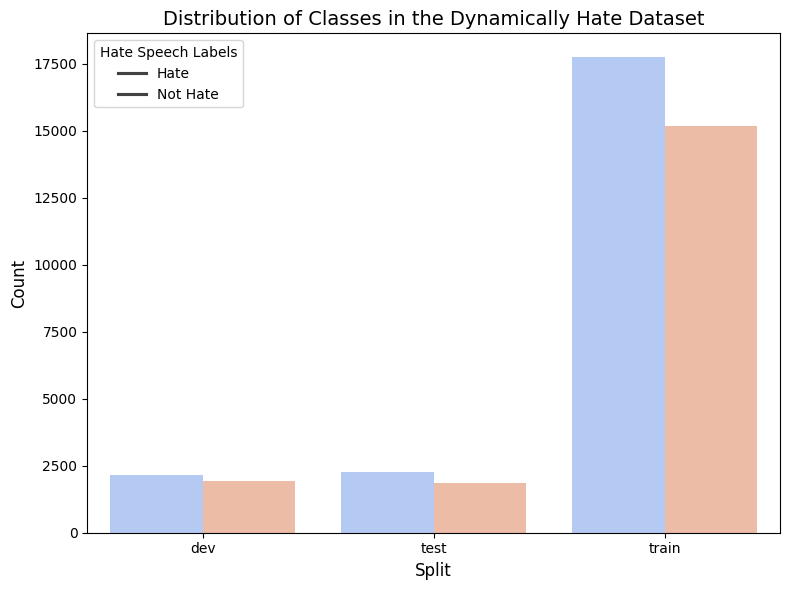

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('DynamicallyHateDataset.csv')

# Count data by split and label
count_data = data.groupby(['split', 'label']).size().reset_index(name='count')

# Set up the plot
plt.figure(figsize=(8, 6))
sns.barplot(data=count_data, x='split', y='count', hue='label', palette='coolwarm')

# Add labels and title
plt.title('Distribution of Classes in the Dynamically Hate Dataset', fontsize=14)
plt.xlabel('Split', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Hate Speech Labels', labels=['Hate', 'Not Hate'], fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


2. Training
In this section, we are going to adopt two pre-trained language models and fine-tune both on the Dynamically Generated Hate dataset (train and dev splits).

We used the Transformers library provided by the Hugging Face with the following pre-trained models:

bert-base-uncased: BERT is a transformers model pretrained on a large corpus of English data in a self-supervised style.
distilbert-base-uncased: DistilBERT is a transformers model, smaller and faster than BERT, which was pretrained on the same corpus in a self-supervised fashion, using the BERT base model as a teacher.


In [ ]:
!python fine_tune_transformer.py distilbert-base-uncased


python3: can't open file '/content/fine_tune_transformer.py': [Errno 2] No such file or directory


In [ ]:
# BERT
# api: e643d3de736824607ddd82dd2117da5e63ef881e
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback
from datasets import Dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd

# Step 1: Load and Prepare the Dataset
train_data = pd.read_csv('train.csv')
dev_data = pd.read_csv('dev.csv')

train_texts = train_data['text'].tolist()
train_labels = train_data['label'].apply(lambda x: 1 if x == 'hate' else 0).tolist()
dev_texts = dev_data['text'].tolist()
dev_labels = dev_data['label'].apply(lambda x: 1 if x == 'hate' else 0).tolist()

train_dataset = Dataset.from_dict({'text': train_texts, 'label': train_labels})
dev_dataset = Dataset.from_dict({'text': dev_texts, 'label': dev_labels})

# Step 2: Tokenize the Dataset
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def tokenize_function(example):
    return tokenizer(example['text'], padding="max_length", truncation=True)

tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_dev = dev_dataset.map(tokenize_function, batched=True)

# Step 3: Load the Pre-trained Model with Dropout Regularization
bert_model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=2,
    hidden_dropout_prob=0.3  # Increased dropout to 30%
)

# Step 4: Define Training Arguments with Improvements
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=3e-6,                   # Lower learning rate
    per_device_train_batch_size=8,       # Smaller batch size
    per_device_eval_batch_size=8,
    num_train_epochs=8,                  # Reduced number of epochs
    logging_dir="./logs",
    logging_steps=50,
    save_total_limit=2,
    fp16=True,
    load_best_model_at_end=True,
    evaluation_strategy="epoch",
    lr_scheduler_type="cosine",          # Cosine decay scheduler
    warmup_steps=200,                    # Reduced warmup steps
    weight_decay=0.1,                    # Stronger weight decay
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    max_grad_norm=0.5,                   # Gradient clipping
)

# Step 5: Reduce Dataset Size for Debugging (Optional)
small_train_dataset = tokenized_train.shuffle(seed=42).select(range(5000))  # Use 5000 examples
small_dev_dataset = tokenized_dev.shuffle(seed=42).select(range(1000))      # Use 1000 examples

# Step 6: Define the compute_metrics Function
def compute_metrics(eval_pred):
    """
    Compute accuracy, precision, recall, and F1-score for evaluation.
    """
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)  # Convert logits to class predictions
    acc = accuracy_score(labels, predictions)  # Accuracy
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, predictions, average="weighted"
    )
    return {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1,
    }

# Step 7: Initialize the Trainer with Built-in EarlyStoppingCallback
trainer = Trainer(
    model=bert_model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_dev_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,  # Add the compute_metrics function
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)],  # Patience for stopping
)

# Step 8: Train the Model
trainer.train()

# Step 9: Evaluate the Model
eval_results = trainer.evaluate()
print("Evaluation Results:", eval_results)

# Step 10: Save the Model
trainer.save_model("./bert-finetuned")  # Save the fine-tuned model
tokenizer.save_pretrained("./bert-finetuned")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/32924 [00:00<?, ? examples/s]

Map:   0%|          | 0/4100 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-9-ac3c6e69db96>:82: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wand

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [ ]:
# Install required libraries
!pip install transformers datasets scikit-learn

# Import necessary libraries
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback
from datasets import Dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd

# Step 1: Load and Prepare the Dataset
train_data = pd.read_csv('train.csv')
dev_data = pd.read_csv('dev.csv')

train_texts = train_data['text'].tolist()
train_labels = train_data['label'].apply(lambda x: 1 if x == 'hate' else 0).tolist()
dev_texts = dev_data['text'].tolist()
dev_labels = dev_data['label'].apply(lambda x: 1 if x == 'hate' else 0).tolist()

train_dataset = Dataset.from_dict({'text': train_texts, 'label': train_labels})
dev_dataset = Dataset.from_dict({'text': dev_texts, 'label': dev_labels})

# Step 2: Tokenize the Dataset
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def tokenize_function(example):
    return tokenizer(example['text'], padding="max_length", truncation=True)

tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_dev = dev_dataset.map(tokenize_function, batched=True)

# Step 3: Load the Pre-trained DistilBERT Model
distilbert_model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=2  # Binary classification
)

# Step 4: Define Training Arguments with Improvements
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=3e-6,                   # Lower learning rate
    per_device_train_batch_size=8,       # Smaller batch size
    per_device_eval_batch_size=8,
    num_train_epochs=6,                  # Reduced number of epochs
    logging_dir="./logs",
    logging_steps=50,
    save_total_limit=2,
    fp16=True,
    load_best_model_at_end=True,
    evaluation_strategy="epoch",
    lr_scheduler_type="cosine",          # Cosine decay scheduler
    warmup_steps=200,                    # Reduced warmup steps
    weight_decay=0.1,                    # Stronger weight decay
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    max_grad_norm=0.5,                   # Gradient clipping
)

# Step 5: Reduce Dataset Size for Debugging (Optional)
small_train_dataset = tokenized_train.shuffle(seed=42).select(range(5000))  # Use 5000 examples
small_dev_dataset = tokenized_dev.shuffle(seed=42).select(range(1000))      # Use 1000 examples

# Step 6: Define the compute_metrics Function
def compute_metrics(eval_pred):
    """
    Compute accuracy, precision, recall, and F1-score for evaluation.
    """
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)  # Convert logits to class predictions
    acc = accuracy_score(labels, predictions)  # Accuracy
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, predictions, average="weighted"
    )
    return {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1,
    }

# Step 7: Initialize the Trainer with Built-in EarlyStoppingCallback
trainer = Trainer(
    model=distilbert_model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_dev_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,  # Add the compute_metrics function
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],  # Patience for stopping
)

# Step 8: Train the Model
trainer.train()

# Step 9: Evaluate the Model
eval_results = trainer.evaluate()
print("Evaluation Results:", eval_results)

# Step 10: Save the Model
trainer.save_model("./distilbert-finetuned")  # Save the fine-tuned model
tokenizer.save_pretrained("./distilbert-finetuned")





/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/32924 [00:00<?, ? examples/s]

Map:   0%|          | 0/4100 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-6-e20aa886de8f>:83: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using 

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.641300,0.644724,0.623000,0.636606,0.623000,0.611218
2,0.557400,0.584273,0.691000,0.713599,0.691000,0.681344
3,0.492600,0.554155,0.718000,0.726311,0.718000,0.714743
4,0.430000,0.565668,0.719000,0.730797,0.719000,0.714618
5,0.444200,0.566259,0.718000,0.729081,0.718000,0.713817
6,0.423600,0.562676,0.723000,0.729948,0.723000,0.720324


Evaluation Results: {'eval_loss': 0.554155170917511, 'eval_accuracy': 0.718, 'eval_precision': 0.726311011062624, 'eval_recall': 0.718, 'eval_f1': 0.7147428703429773, 'eval_runtime': 4.2594, 'eval_samples_per_second': 234.773, 'eval_steps_per_second': 29.347, 'epoch': 6.0}


('./distilbert-finetuned/tokenizer_config.json',
 './distilbert-finetuned/special_tokens_map.json',
 './distilbert-finetuned/vocab.txt',
 './distilbert-finetuned/added_tokens.json',
 './distilbert-finetuned/tokenizer.json')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

3. Prediction
In this section, we are going to load the fine-tuned models and predict the probabilities of label 1 (Hate) and label 0 (Not-hate) for the HateCheck test cases.As a baseline, we adopted a Logistic Regression classifier.

In [ ]:
# baseline prediction ：To provide a simple, interpretable, and fast model to compare against more complex models like BERT or DistilBERT.
# Install required libraries
!pip install scikit-learn pandas

# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import logging

# Step 1: Load and Prepare the Dataset
train_data = pd.read_csv('train.csv')
dev_data = pd.read_csv('dev.csv')

train_texts = train_data['text'].tolist()
train_labels = train_data['label'].apply(lambda x: 1 if x == 'hate' else 0).tolist()
dev_texts = dev_data['text'].tolist()
dev_labels = dev_data['label'].apply(lambda x: 1 if x == 'hate' else 0).tolist()

# Step 2: Define the Baseline Model Pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer()),         # Convert text to bag-of-words
    ('tfidf', TfidfTransformer()),       # Convert bag-of-words to TF-IDF
    ('lr', LogisticRegression(solver='saga', max_iter=1000))  # Logistic Regression with a saga solver
])

# Step 3: Train the Baseline Model
logging.info("Training the baseline model...")
pipeline.fit(train_texts, train_labels)

# Step 4: Evaluate the Baseline Model
logging.info("Evaluating the baseline model...")
dev_predictions = pipeline.predict(dev_texts)
accuracy = accuracy_score(dev_labels, dev_predictions)
precision = precision_score(dev_labels, dev_predictions, average="weighted")
recall = recall_score(dev_labels, dev_predictions, average="weighted")
f1 = f1_score(dev_labels, dev_predictions, average="weighted")

print("Evaluation Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Step 5: Save the Baseline Model
import pickle
with open('./baseline_model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)
print("Baseline model saved to './baseline_model.pkl'")

# Step 6: Load and Predict with the Baseline Model
def predict_baseline(sentence):
    """
    Predict a single sentence using the saved baseline model.
    Args:
        sentence (str): Input sentence to classify.
    Returns:
        dict: Predicted probabilities and the predicted class.
    """
    # Load the saved model
    with open('./baseline_model.pkl', 'rb') as f:
        model = pickle.load(f)

    # Predict probabilities
    probabilities = model.predict_proba([sentence])[0]
    predicted_class = probabilities.argmax()  # Get the class with the highest probability

    # Map the class to labels
    class_map = {0: "hate", 1: "not-hate"}
    return {"probabilities": probabilities, "predicted_class": class_map[predicted_class]}


# Test the prediction
sample_sentence = "I hate everyone."  # Replace with your input sentence
prediction = predict_baseline(sample_sentence)
print(f"Prediction for '{sample_sentence}': {prediction}")

Evaluation Results:
Accuracy: 0.6729
Precision: 0.6725
Recall: 0.6729
F1 Score: 0.6719
Baseline model saved to './baseline_model.pkl'
Prediction for 'I hate everyone.': {'probabilities': array([0.89925677, 0.10074323]), 'predicted_class': 'hate'}


In [ ]:
# tranasform predict
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

class TransformerPredict:
    def __init__(self, model_path):
        self.tokenizer = AutoTokenizer.from_pretrained(model_path)
        self.model = AutoModelForSequenceClassification.from_pretrained(model_path)

    def predict(self, sentence):
        inputs = self.tokenizer(sentence, return_tensors="pt", truncation=True, padding=True, max_length=512)
        with torch.no_grad():
            logits = self.model(**inputs).logits
            probabilities = torch.softmax(logits, dim=-1).numpy()[0]
        predicted_class = probabilities.argmax()
        return probabilities, predicted_class




In [ ]:
# baseline predict
import pickle

class BaselinePredict:
    def __init__(self, model_path):
        with open(model_path, "rb") as f:
            self._model = pickle.load(f)

    def predict(self, sentence):
        probabilities = self._model.predict_proba([sentence])[0]
        predicted_class = probabilities.argmax()
        return probabilities, predicted_class


In [ ]:
# Import pandas for test data
import pandas as pd

# Load test data
df_test = pd.read_csv("test.csv")

# Paths to saved models
BERT_MODEL_PATH = "./bert-finetuned"
DISTILBERT_MODEL_PATH = "./distilbert-finetuned"
BASELINE_MODEL_PATH = "./baseline_model.pkl"

# Load models
bert_predictor = TransformerPredict(BERT_MODEL_PATH)
distilbert_predictor = TransformerPredict(DISTILBERT_MODEL_PATH)
baseline_predictor = BaselinePredict(BASELINE_MODEL_PATH)

# Example usage
sentence = "I hate everyone."
bert_probs, bert_pred = bert_predictor.predict(sentence)
distilbert_probs, distilbert_pred = distilbert_predictor.predict(sentence)
baseline_probs, baseline_pred = baseline_predictor.predict(sentence)

# Print results
print(f"BERT Prediction: {bert_probs}, Class: {bert_pred}")
print(f"DistilBERT Prediction: {distilbert_probs}, Class: {distilbert_pred}")
print(f"Baseline Prediction: {baseline_probs}, Class: {baseline_pred}")



OSError: Incorrect path_or_model_id: './bert-finetuned'. Please provide either the path to a local folder or the repo_id of a model on the Hub.

In [ ]:
import pandas as pd

# Assuming test_data is a list or DataFrame-like object
data = []  # List to store results

# Check the type of test_data
print(type(test_data))  # Use this to debug if needed

# Adjust iteration based on test_data type
if isinstance(test_data, pd.DataFrame):
    # Use .iterrows() for DataFrame
    for _, row in test_data[:50].iterrows():
        text = row["text"]
        label = row["label"]

        # Get predictions for each model
        baseline_probs, baseline_pred = baseline_predictor.predict(text)
        bert_probs, bert_pred = bert_predictor.predict(text)
        distilbert_probs, distilbert_pred = distilbert_predictor.predict(text)

        # Append results for each model
        data.append({"text": text, "label": label, "model": "baseline", "score_0": baseline_probs})
        data.append({"text": text, "label": label, "model": "bert", "score_0": bert_probs})
        data.append({"text": text, "label": label, "model": "distilbert", "score_0": distilbert_probs})
else:
    # Assume test_data is a list of dictionaries
    for row in test_data[:500]:
        text = row["text"]
        label = row["label"]

        # Get predictions for each model
        baseline_probs, baseline_pred = baseline_predictor.predict(text)
        bert_probs, bert_pred = bert_predictor.predict(text)
        distilbert_probs, distilbert_pred = distilbert_predictor.predict(text)

        # Append results for each model
        data.append({"text": text, "label": label, "model": "baseline", "score_0": baseline_probs})
        data.append({"text": text, "label": label, "model": "bert", "score_0": bert_probs})
        data.append({"text": text, "label": label, "model": "distilbert", "score_0": distilbert_probs})

# Convert list to DataFrame
df = pd.DataFrame(data)

# Display the first few rows
print(df.head(10))


NameError: name 'test_data' is not defined